# Kidney Disease Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Get data

In [3]:
df = pd.read_csv('files/kidney_disease.csv')
df.info() # 400 patients, 25 features and a target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.describe() # some missing data will need to be imputed

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## EDA

<AxesSubplot:>

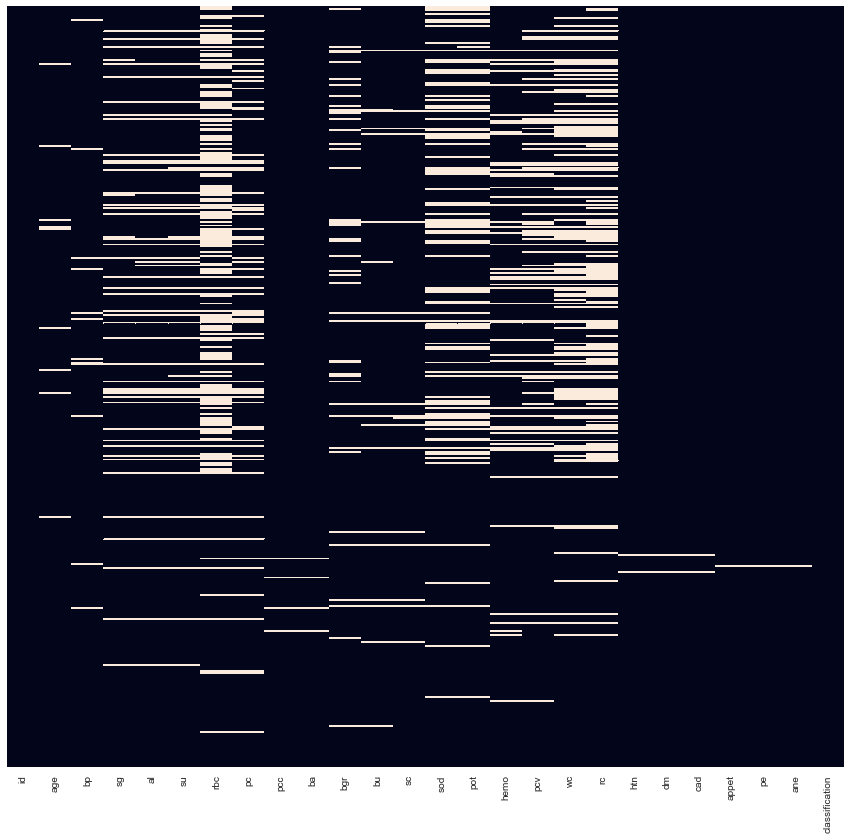

In [6]:
plt.figure(figsize=(15,14))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

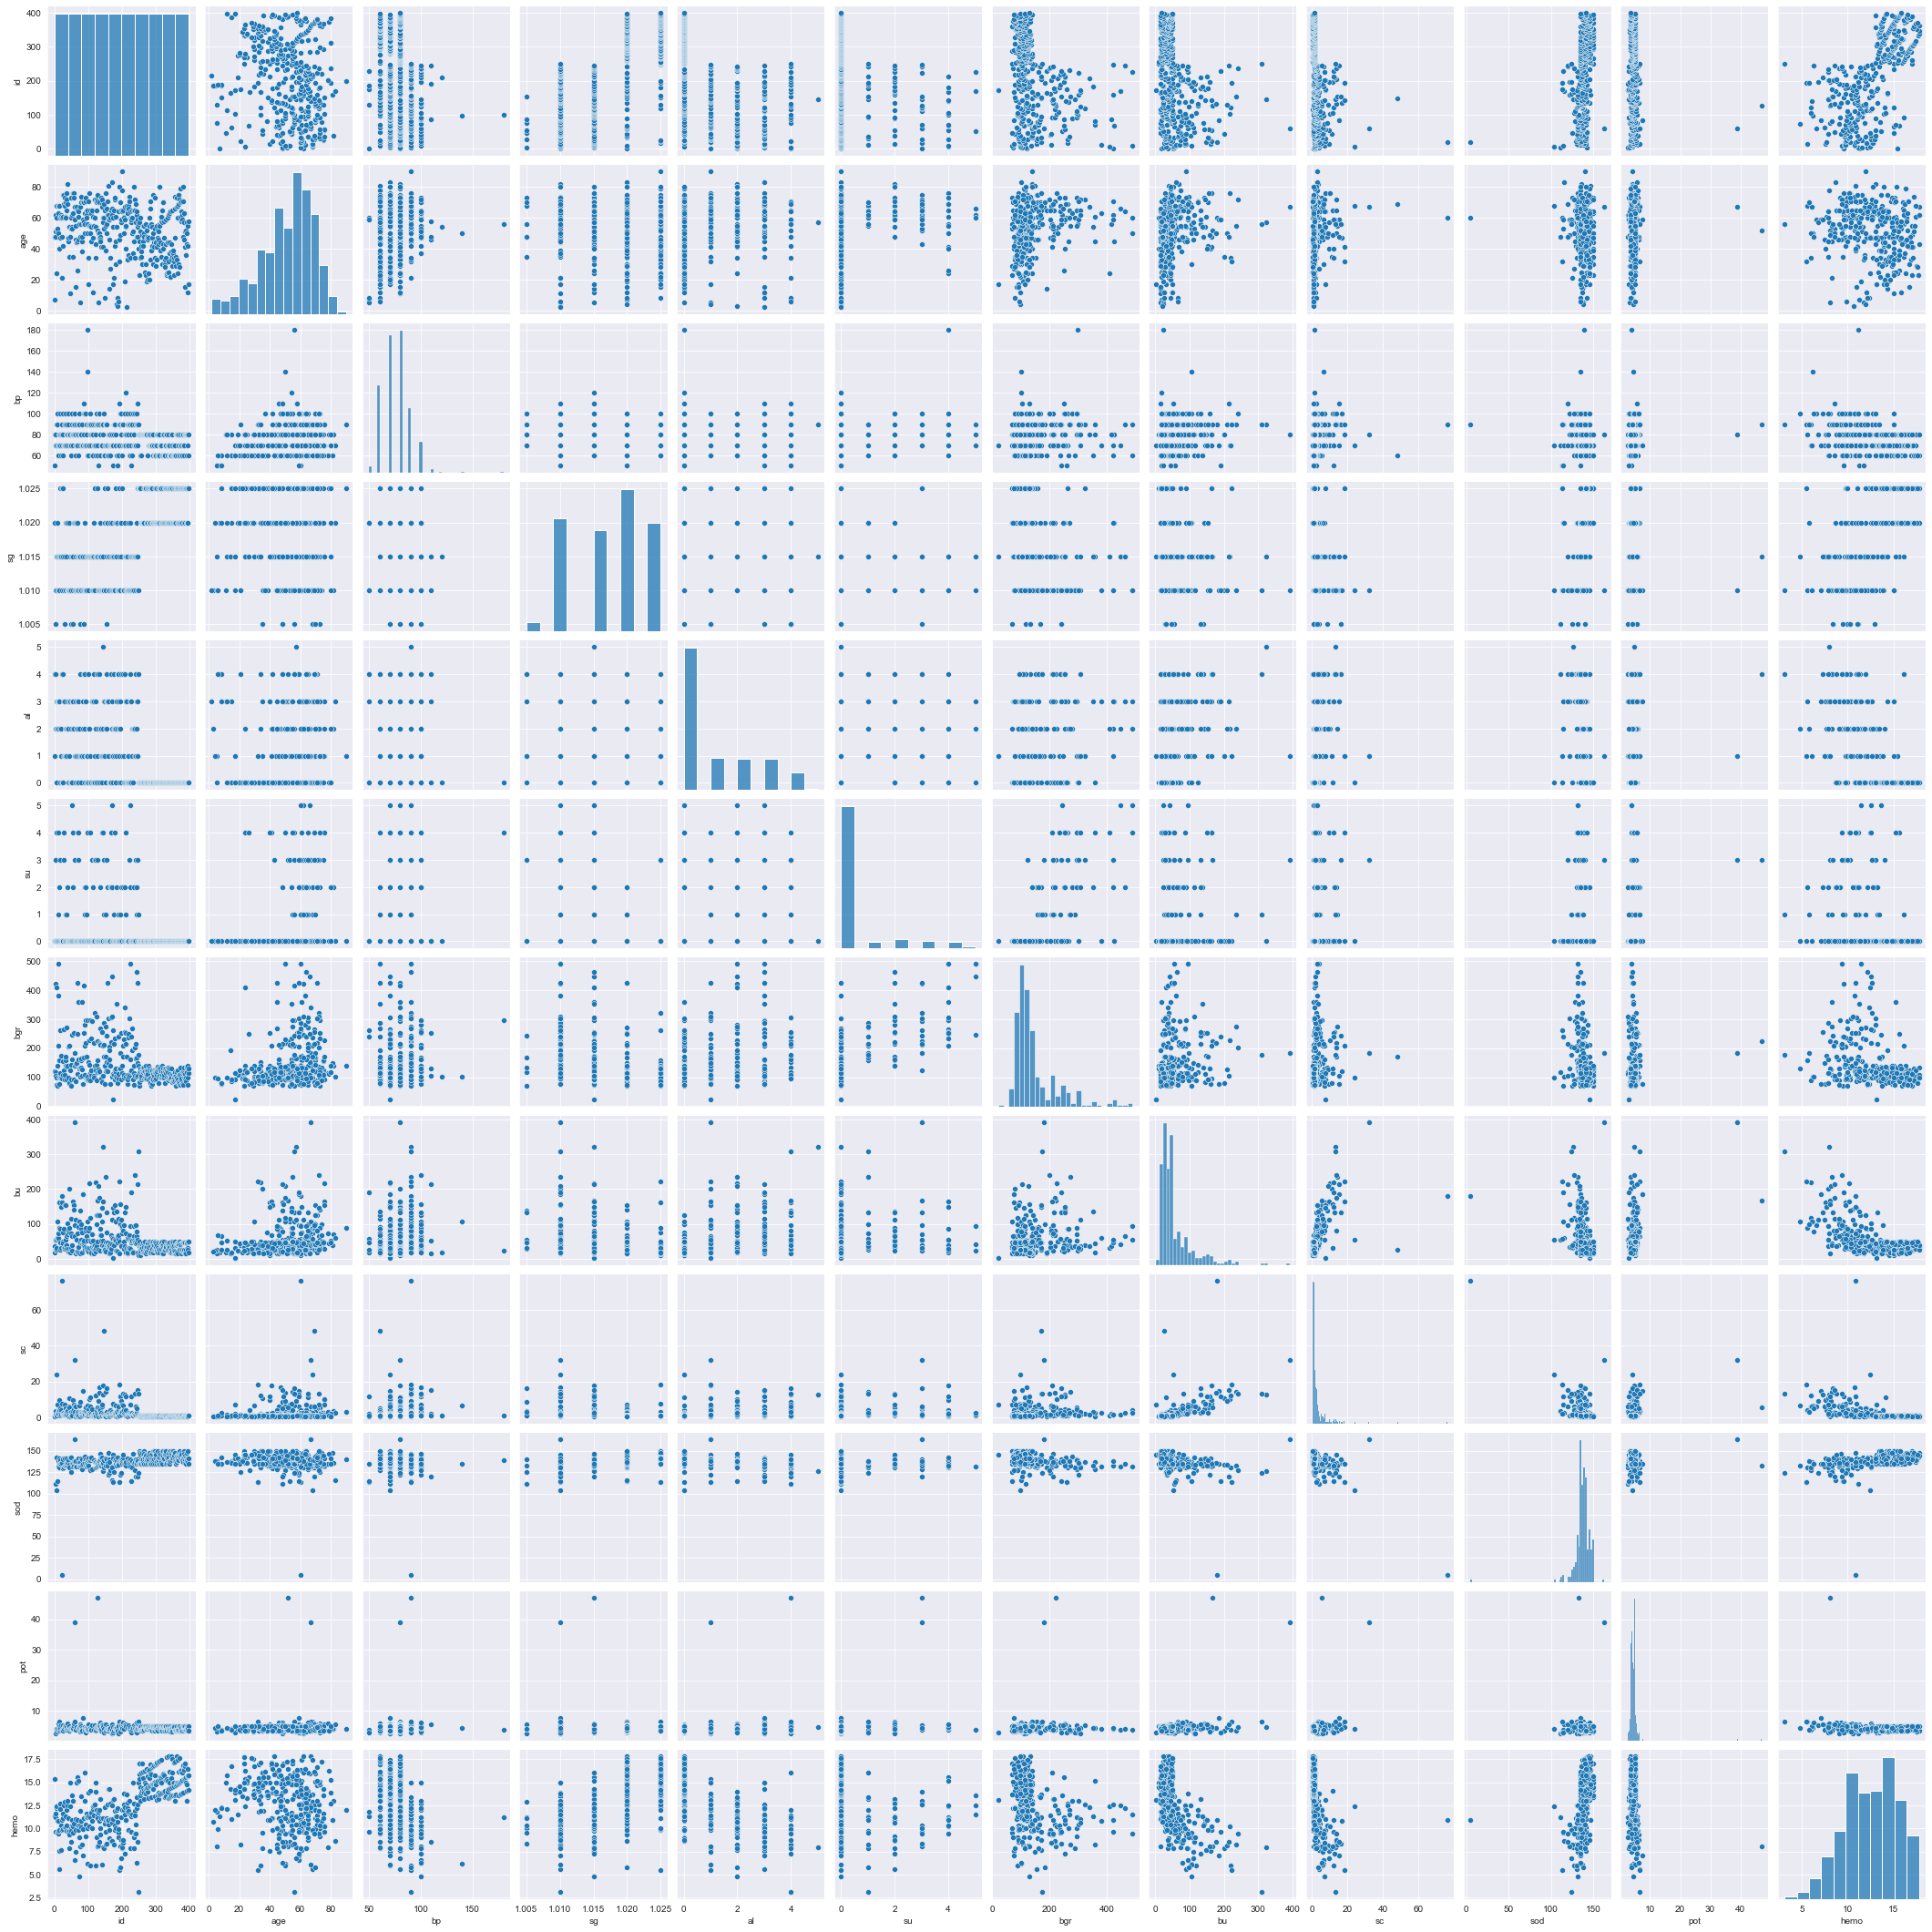

In [7]:
sns.pairplot(df)

## Data Preprocessing

#### Impute missing numeric data

In [8]:
numeric = ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo']

In [9]:
for numCol in numeric:
    df[numCol].fillna(df[numCol].median(),inplace=True)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


#### Impute missing numeric data stored in object form

In [10]:
df[['pcv','wc','rc']] # numeric but stored as object

,pcv,wc,rc
0,44,7800,5.2
1,38,6000,NaN
2,31,7500,NaN
3,32,6700,3.9
4,35,7300,4.6
...,...,...,...
395,47,6700,4.9
396,54,7800,6.2
397,49,6600,5.4
398,51,7200,5.9


In [11]:
df['pcv'].dropna().apply(lambda x: float(x))
df['wc'].dropna().apply(lambda x: float(x))
df['rc'].dropna().apply(lambda x: float(x))

ValueError: could not convert string to float: '\t?'

###### pcv

In [12]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [13]:
df[(df['pcv'] == '\t43')]['pcv'].index

Int64Index([214], dtype='int64')

In [14]:
df['pcv'].loc[[66]] = '43'

In [15]:
df[(df['pcv'] == '\t?')]['pcv'].index

Int64Index([], dtype='int64')

In [16]:
df['pcv'].loc[[214]] = '0.0'

In [17]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '43', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '20', '0.0', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [18]:
df['pcv'] = df['pcv'].apply(lambda x: float(x))

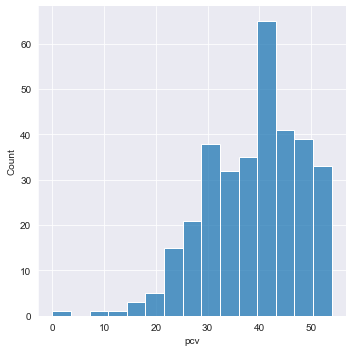

In [19]:
sns.displot(df['pcv']) # Left skewed, use median

In [20]:
df['pcv'].fillna(df['pcv'].drop(index=214).median(),inplace=True)

In [21]:
df['pcv'].loc[214] = df['pcv'].drop(index=214).median()

In [22]:
df['pcv'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., 40., 16., 24.,
       37., 30., 34., 45., 27., 48., 43., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 20., 47.,  9., 49., 50.,
       53., 51., 54.])

##### wc

In [23]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [24]:
df[(df['wc'] == '\t8400')]['pcv'] = 8400

In [25]:
df[(df['wc'] == '\t6200')]['pcv'] = 6200

In [26]:
df[(df['wc'] == '\t?')]['pcv'].index

Int64Index([185], dtype='int64')

In [27]:
df['wc'].loc[185] = 0

In [28]:
df['wc'] = df['wc'].apply(lambda x: float(x))

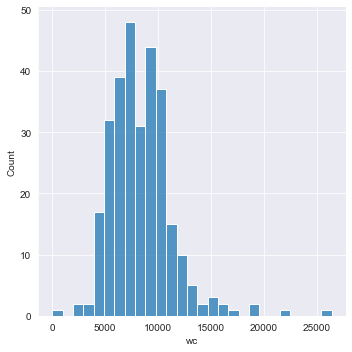

In [29]:
sns.displot(df['wc']) # right skewed, median

In [30]:
df['wc'].fillna(df['wc'].drop(index=185).median(),inplace=True)

In [31]:
df['wc'].loc[185] = df['wc'].drop(index=185).median()

In [32]:
df['wc'].unique()

array([ 7800.,  6000.,  7500.,  6700.,  7300.,  8000.,  6900.,  9600.,
       12100.,  4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,
        6200.,  8300.,  8400., 10300.,  9800.,  9100.,  7900.,  6400.,
        8600., 18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700.,
       14600.,  6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200.,
       12500.,  5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,
        6500., 13600., 10200.,  9000., 14900.,  8200., 15200.,  5000.,
       16300., 12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,
        2200., 12800., 11200., 19100., 12300., 16700.,  2600., 26400.,
        8800.,  7400.,  4900., 12000., 15700.,  4100.,  5700., 11500.,
        5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,  5100.,
        6600.])

##### rc

In [33]:
df['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [34]:
df[df['rc'] =='\t?']['rc'].index

Int64Index([162], dtype='int64')

In [35]:
df['rc'].loc[162] = 1000

In [36]:
df['rc'] = df['rc'].apply(lambda x: float(x))

<AxesSubplot:xlabel='rc', ylabel='count'>

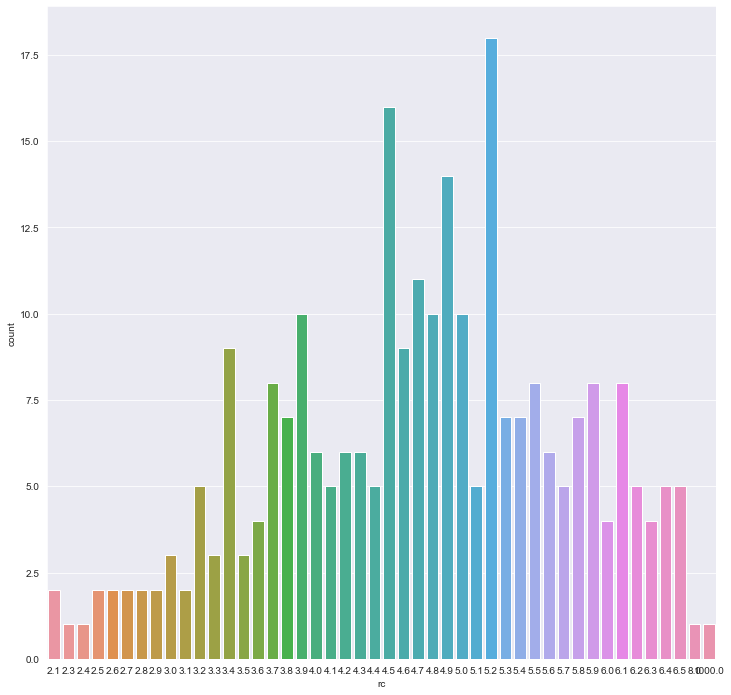

In [37]:
plt.figure(figsize=(12,12))
sns.countplot(df['rc']) 

In [38]:
df['rc'].fillna(df['rc'].median(),inplace=True)

In [39]:
df['rc'].loc[162] = df['rc'].median()

In [40]:
df['rc'].unique()

array([5.2, 4.8, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3,
       3.2, 3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6,
       2.3, 2.9, 2.7, 8. , 3.3, 3. , 2.4, 5.4, 6.1, 6.2, 6.3, 5.1, 5.8,
       5.5, 5.3, 6.4, 5.7, 5.9, 6.5])

### Non-numeric variables

In [41]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

#### Clean up cad values

In [42]:
df['cad'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [43]:
df['cad'][df['cad'] == '\tno'] = 'no'

In [44]:
df['cad'].unique()

array(['no', 'yes', nan], dtype=object)

#### Clean up dm values

In [45]:
df['dm'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [46]:
df['dm'][df['dm'] == '\tno'] = 'no'

In [47]:
df['dm'][df['dm'] == '\tyes'] = 'yes'

In [48]:
df['dm'][df['dm'] == ' yes'] = 'yes'

In [49]:
df['dm'].unique()

array(['yes', 'no', nan], dtype=object)

#### Impute modal values into categorical variables

In [50]:
cat_feats = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad','appet', 'pe', 'ane']

In [51]:
for catCol in cat_feats:    
    df[catCol].fillna(str(df[catCol].mode()).split()[1],inplace=True)

In [52]:
nn = pd.get_dummies(df,columns=cat_feats)
nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   bgr             400 non-null    float64
 7   bu              400 non-null    float64
 8   sc              400 non-null    float64
 9   sod             400 non-null    float64
 10  pot             400 non-null    float64
 11  hemo            400 non-null    float64
 12  pcv             400 non-null    float64
 13  wc              400 non-null    float64
 14  rc              400 non-null    float64
 15  classification  400 non-null    object 
 16  rbc_abnormal    400 non-null    uint8  
 17  rbc_normal      400 non-null    uin

#### Prep target variable

In [59]:
nn['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [60]:
nn['classification'][nn['classification'] == 'ckd\t'] = 'ckd'

In [61]:
nn['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [62]:
nn['classification'] = nn['classification'].apply(lambda x: 1 if x == 'ckd' else 0)

#### Verify no more missing values

<AxesSubplot:>

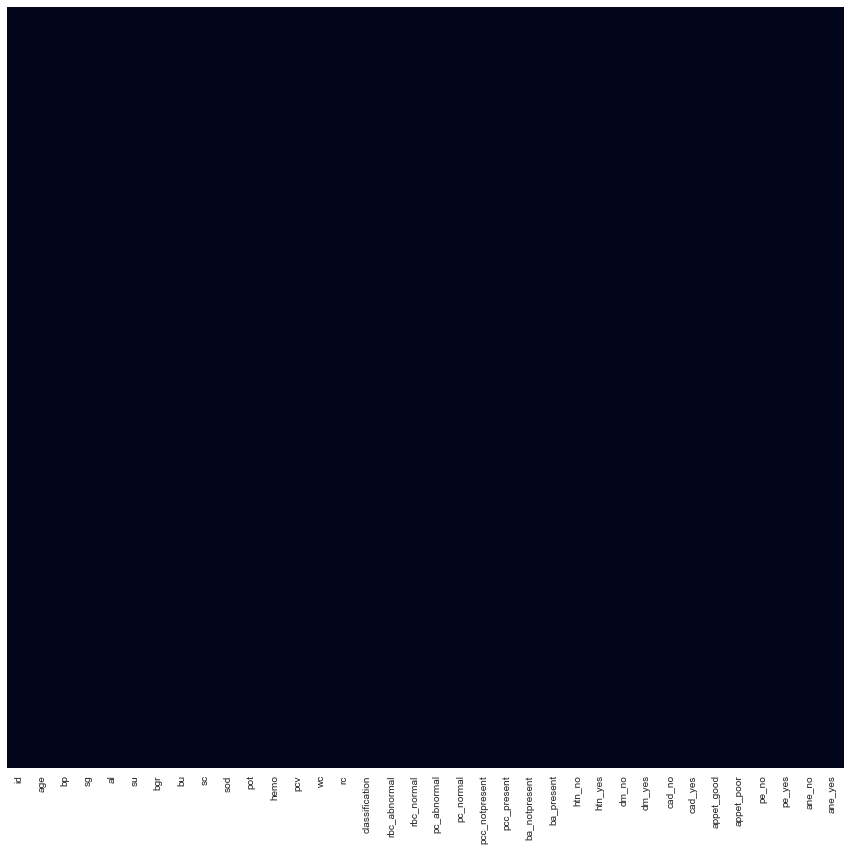

In [63]:
plt.figure(figsize=(15,14))
sns.heatmap(nn.isnull(),yticklabels=False,cbar=False)

## Split data into Train and Test

In [64]:
X = nn.drop('classification', axis=1)
y = nn['classification']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Modelling 

### Decision Tree

#### Build and train model

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtc = DecisionTreeClassifier()

In [71]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

#### Make predictions on test data

In [72]:
pred = dtc.predict(X_test)

#### Evaluate model performance

In [73]:
from sklearn.metrics import confusion_matrix,classification_report

<AxesSubplot:>

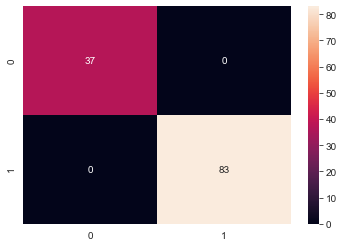

In [76]:
# 37 TN, 0 FP, 0, FN, 83 TP
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [77]:
# Perfect stats (insane luck or very predictive features??)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        83

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



### Random Forest

#### Build and train model

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(n_estimators=200)

In [80]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

#### Make predictions on test data

In [81]:
pred = rfc.predict(X_test)

#### Evaluate model performance

<AxesSubplot:>

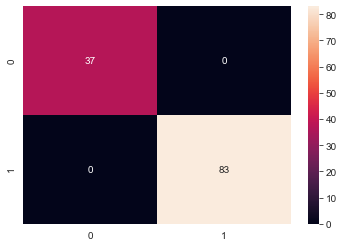

In [82]:
# Also 37 TN, 0 FP, 0 FN, 83 TP (features are very predictive it seems)
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [83]:
# Model has perfect stats again 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        83

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

